In [ ]:
!pip install opencv-python
!pip install albumentations
!pip install matplotlib

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

from modules.utils import imread_jpn, visualize_bbox
from modules.load_anno_voc import AnnoXmlToList


In [2]:
# 入力データのパス
img_path = "./sample_data/sample_image.png"
anno_path = "./sample_data/sample_image.xml"


In [21]:
def show_image(
    img: np.ndarray
) -> None:
    """NoteBook上に画像を表示
    
    Args:
        img (np.ndarray): 表示する画像
    """
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    

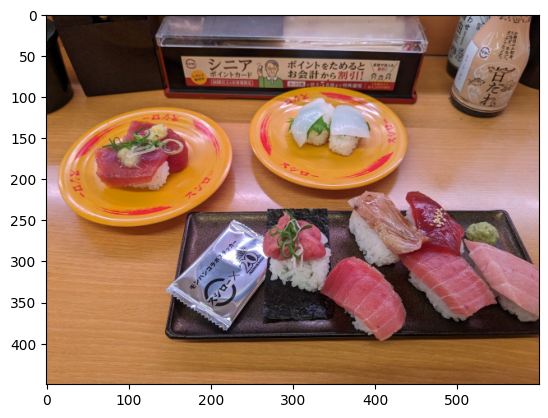

In [45]:
# 画像を読み込んで内容確認
img = imread_jpn(img_path)

height, width = img.shape[:2]

show_image(img)


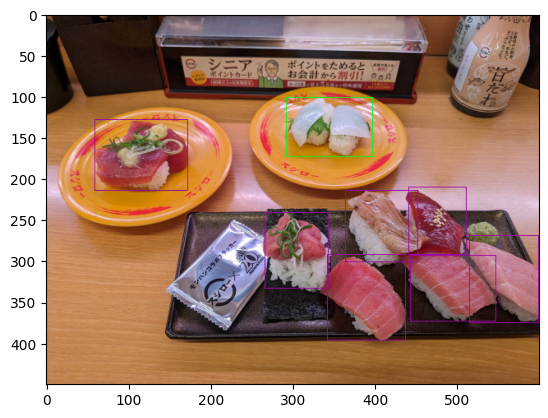

In [23]:
# アノテーションを可視化した画像を表示
bboxes, labels = AnnoXmlToList(["maguro", "ikanikan"])(anno_path)

img_vis = visualize_bbox(img, bboxes, labels, save=False)
show_image(img_vis)


In [59]:
def trans_and_show_image(
    trans_list: list,
) -> None:
    """Augmentationの適用と画像の可視化を一括で実行する関数
    
    Args:
        trans_list (list): 適用するAugmentation
    """
    
    # DataAugmentationの設定と適用
    aug = A.Compose(
        trans_list,
        bbox_params=A.BboxParams(format="coco", label_fields=['labels'])
    )
    transformed = aug(image=img, bboxes=bboxes, labels=labels)

    img_vis = visualize_bbox(transformed['image'], transformed['bboxes'], transformed['labels'], save=False)
    show_image(img_vis)
    

### 幾何変換以外をまとめて

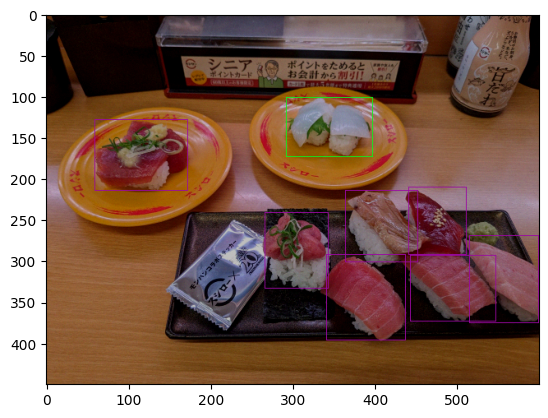

In [62]:
trans_and_show_image([
    A.GaussianBlur(),
    A.GaussNoise(),
    A.RandomBrightnessContrast(),
])


### 幾何変換

##### Flip (反転)

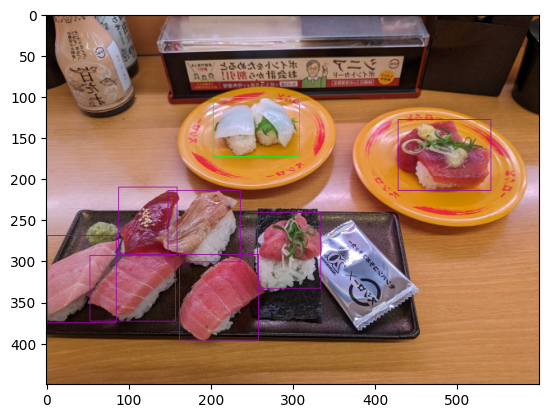

In [64]:
trans_and_show_image([
    A.Flip(p=1)
])


#### Crop (切り出し)

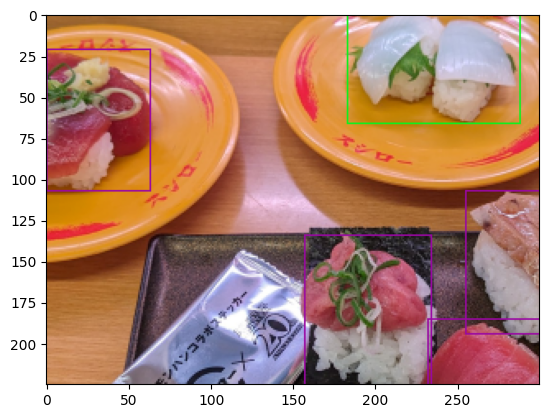

In [69]:
trans_and_show_image([
    A.RandomCrop(height=height//2, width=width//2, p=1)
])


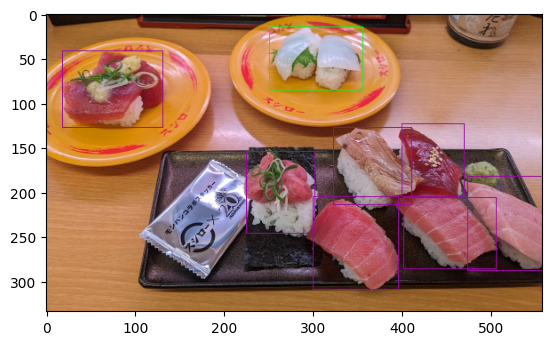

In [72]:
trans_and_show_image([
    A.BBoxSafeRandomCrop(p=1)
])


#### Rotate (回転)

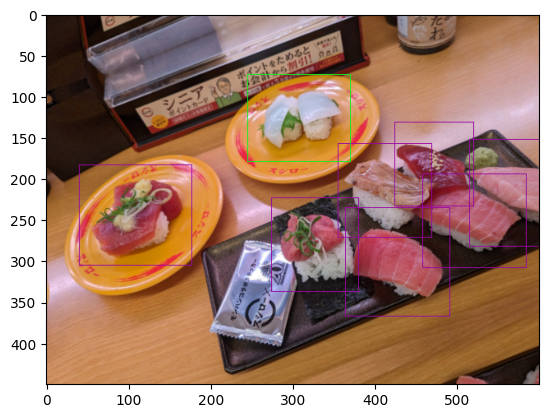

In [99]:
trans_and_show_image([
    A.Rotate(p=1)
])

#### Resize (サイズ変更)

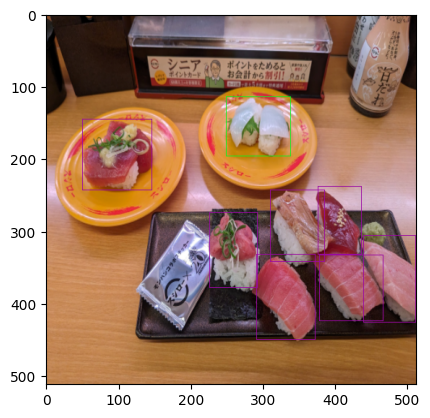

In [100]:
trans_and_show_image([
    A.Resize(height=512, width=512, p=1)
])